<center>
<h1> Visual Analytics </h1>

<h2> Housing Prices in Boston 1978 </h2>

<h2> Latifah Almanea & Ahmed Magdi </h2>

</center>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

housing = pd.read_csv("housing.data.csv", sep=",")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
print(housing.shape) # the dataset has 506 rows and 14 columns 

(506, 14)


### Features Names

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's

In [3]:
housing.isnull().all() #the dataset doesn't have any nan in it

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [4]:
housing.describe() #this shows basic statistics of the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.716290,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,2.653510,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.250895,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,2.326718,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
#create a function for plotting histograms for each feature in the dataset
def distribution(data):
    fig = plt.figure(figsize = (11, 22));
    
    features = housing.columns
    rows = len(features)/2
    rows = math.ceil(rows) #this rounds up the rows to have an even number 
    
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, 2, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 506))
        ax.set_yticks([0, 100, 200, 300, 400])
        ax.set_yticklabels([0, 100, 200, 300, ">400"])

    fig.tight_layout()
    fig.show()

C:\Users\001122940\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


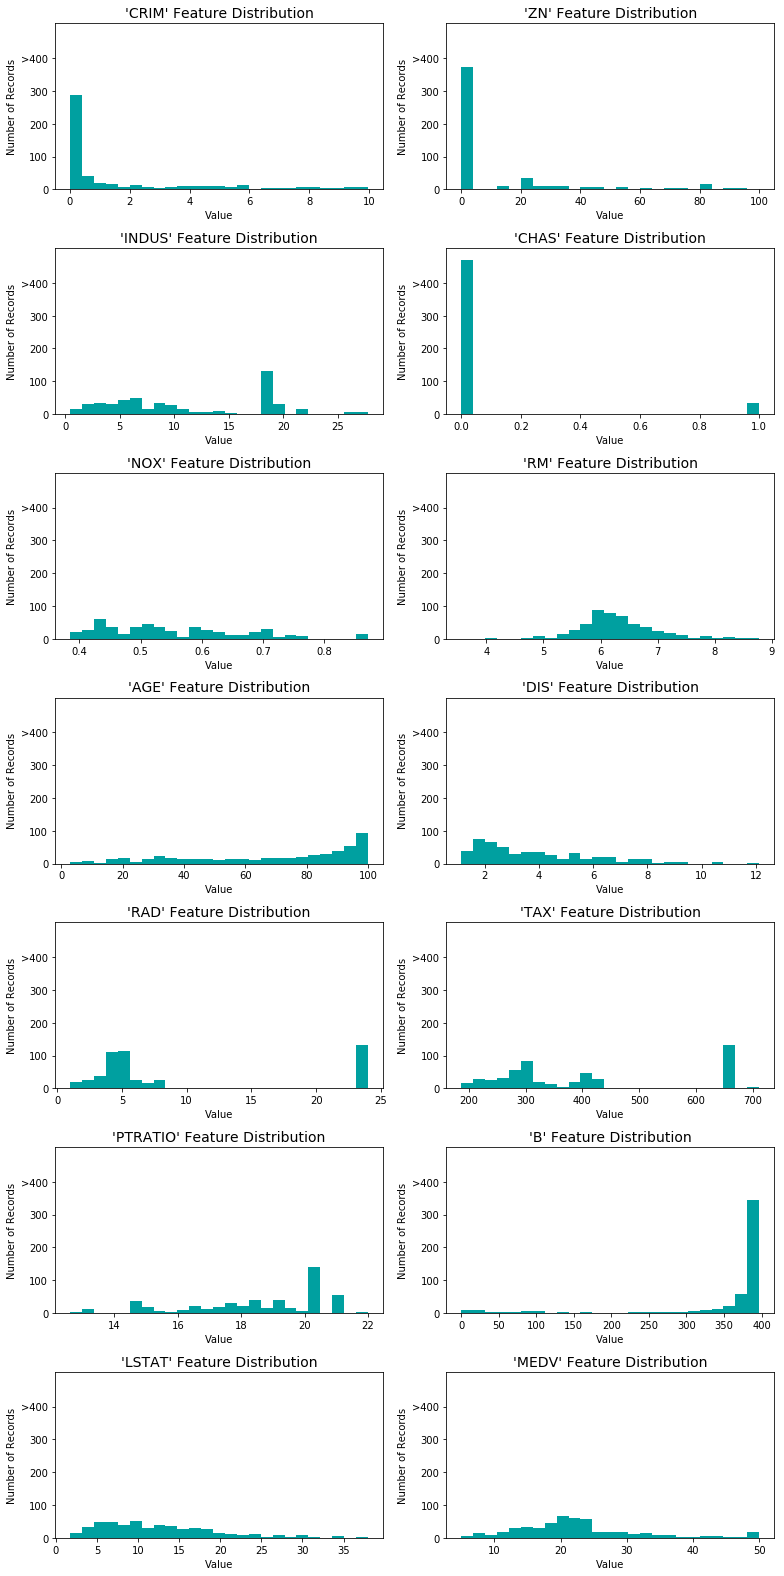

In [6]:
distribution(housing)

### In a Housing dataset, it makes sense to focus on the MEDV feature (Median Value of owner-occupied homes)

In [7]:
housing['MEDV'].median()

21.2

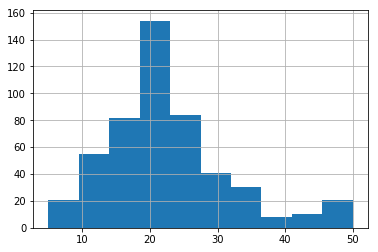

In [8]:
prices = housing['MEDV']
prices.hist()

In [9]:
#Make the MEDV column a primary key and in an ascending order
MEDV = housing.sort_values(by='MEDV', ascending=True)
MEDV.index = MEDV.pop('MEDV')
display(MEDV)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,,,,,,,,,,,,,
5.0,8.35180,0.0,18.10,0,0.6930,5.453,100.0,1.4896,24,666.0,20.2,396.90,30.59
5.0,7.92080,0.0,18.10,0,0.6930,5.683,100.0,1.4254,24,666.0,20.2,384.97,22.98
5.6,5.04610,0.0,18.10,0,0.6930,5.987,100.0,1.5888,24,666.0,20.2,396.90,26.77
6.3,9.91655,0.0,18.10,0,0.6930,5.852,77.8,1.5004,24,666.0,20.2,338.16,29.97
7.0,5.74610,0.0,18.10,0,0.6930,4.519,100.0,1.6582,24,666.0,20.2,88.27,36.98
7.0,0.18337,0.0,27.74,0,0.6090,5.414,98.3,1.7554,4,711.0,20.1,344.05,23.97
7.2,4.23620,0.0,18.10,0,0.6930,6.343,100.0,1.5741,24,666.0,20.2,396.90,20.32
7.2,6.81180,0.0,18.10,0,0.7000,5.277,98.1,1.4261,24,666.0,20.2,396.90,30.81
7.2,8.08460,0.0,18.10,0,0.6790,6.434,100.0,1.8347,24,666.0,20.2,27.25,29.05


## Examine the Corrolation between the features

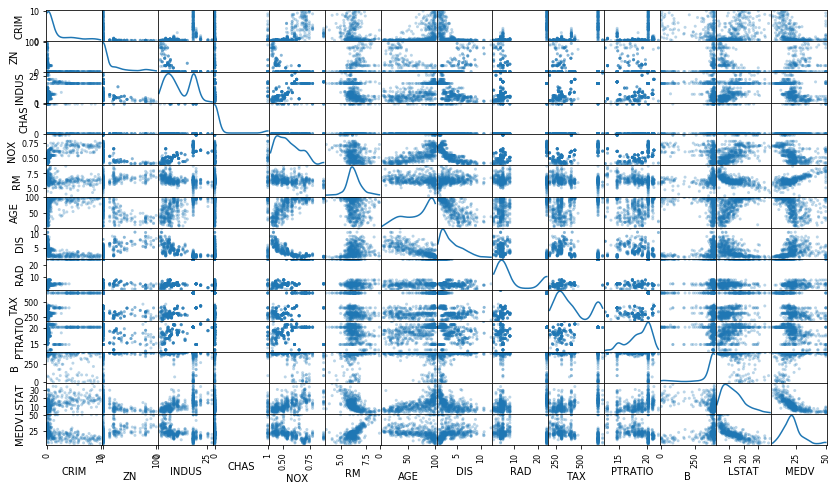

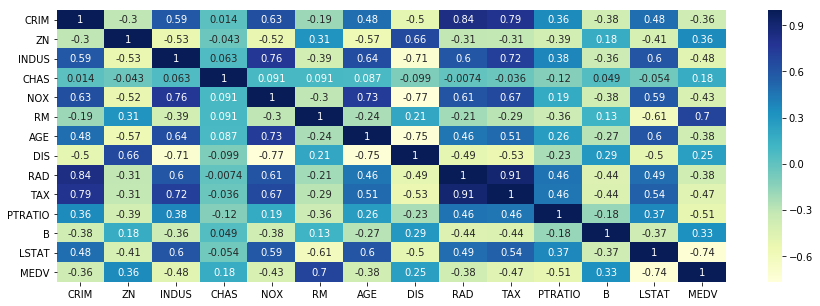

In [10]:
#Visualize a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(housing, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

#Visualize the corrolation between the features in a heatmap
plt.figure(figsize=(15,5))
sns.heatmap(housing.corr(),annot=True, cmap="YlGnBu")

In the scatter matrix and heatmap  above, we looked at the corrolation between the features, either positive or negative.

All of the features show some kind of corrolation, except **CHAS**. Therefore, it will be dropped from this dataset. 

In [11]:
#Drop CHAS from the dataset
housing.drop(['CHAS'], axis=1, inplace=True)
housing.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [12]:
housing.shape #now the dataset has 13 columns

(506, 13)

## Examine the feature RAD (index of accessibility to radial highways)

In [13]:
#Make RAD a primary key and in an ascending order
RAD = housing.sort_values(by='RAD', ascending=True)
RAD.index = RAD.pop('RAD')
display(RAD)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
RAD,,,,,,,,,,,,
1,0.00632,18.0,2.31,0.5380,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.10959,0.0,11.93,0.5730,6.794,89.3,2.3889,273.0,21.0,393.45,6.48,22.0
1,0.04819,80.0,3.64,0.3920,6.108,32.0,9.2203,315.0,16.4,392.89,6.57,21.9
1,0.03548,80.0,3.64,0.3920,5.876,19.1,9.2203,315.0,16.4,395.18,9.25,20.9
1,0.01501,90.0,1.21,0.4010,7.923,24.8,5.8850,198.0,13.6,395.52,3.16,50.0
1,0.00906,90.0,2.97,0.4000,7.088,20.8,7.3073,285.0,15.3,394.72,7.85,32.2
1,0.01096,55.0,2.25,0.3890,6.453,31.9,7.3073,300.0,15.3,394.72,8.23,22.0
1,0.01965,80.0,1.76,0.3850,6.230,31.5,9.0892,241.0,18.2,341.60,12.93,20.1
1,0.01439,60.0,2.93,0.4010,6.604,18.8,6.2196,265.0,15.6,376.70,4.38,29.1


In [14]:
RAD_value = housing.RAD.unique()
RAD_value.sort()
print(RAD_value)

[ 1  2  3  4  5  6  7  8 24]


### Here we do some visual exploration on the features: TAX, MEDV and LSTAT

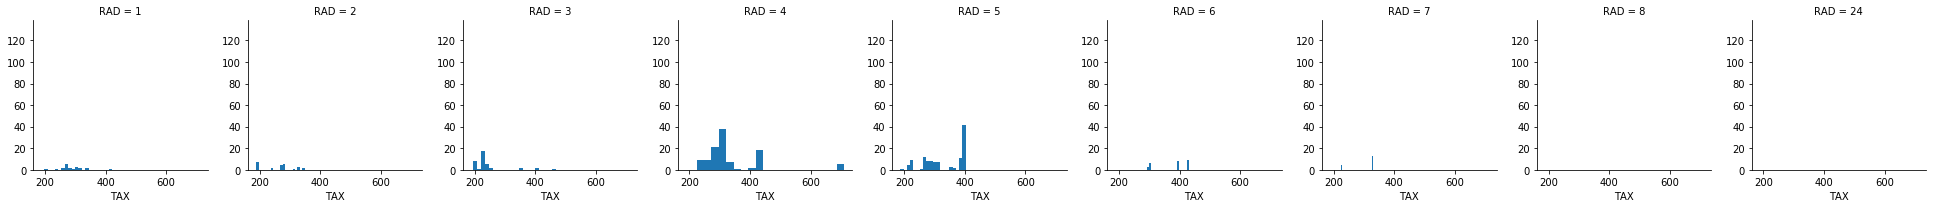

In [15]:
g = sns.FacetGrid(housing, col='RAD')
g.map(plt.hist, 'TAX', bins=20)

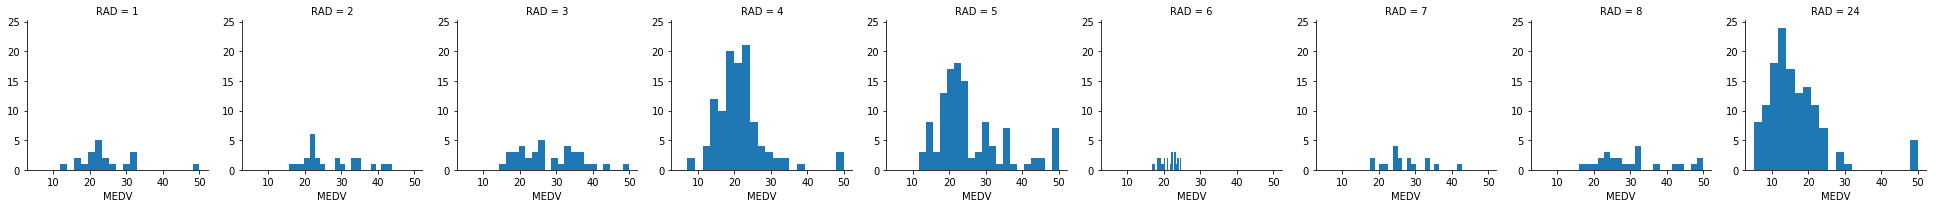

In [16]:
g = sns.FacetGrid(housing, col='RAD')
g.map(plt.hist, 'MEDV', bins=20)

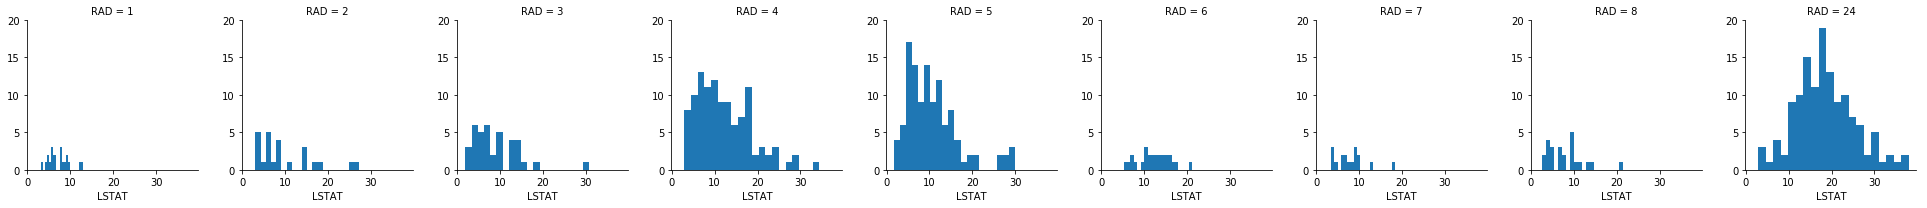

In [17]:
g = sns.FacetGrid(housing, col='RAD')
g.map(plt.hist, 'LSTAT', bins=20)

Text(0.5,1,'Zoneing for lands over 25,000 sq.ft')

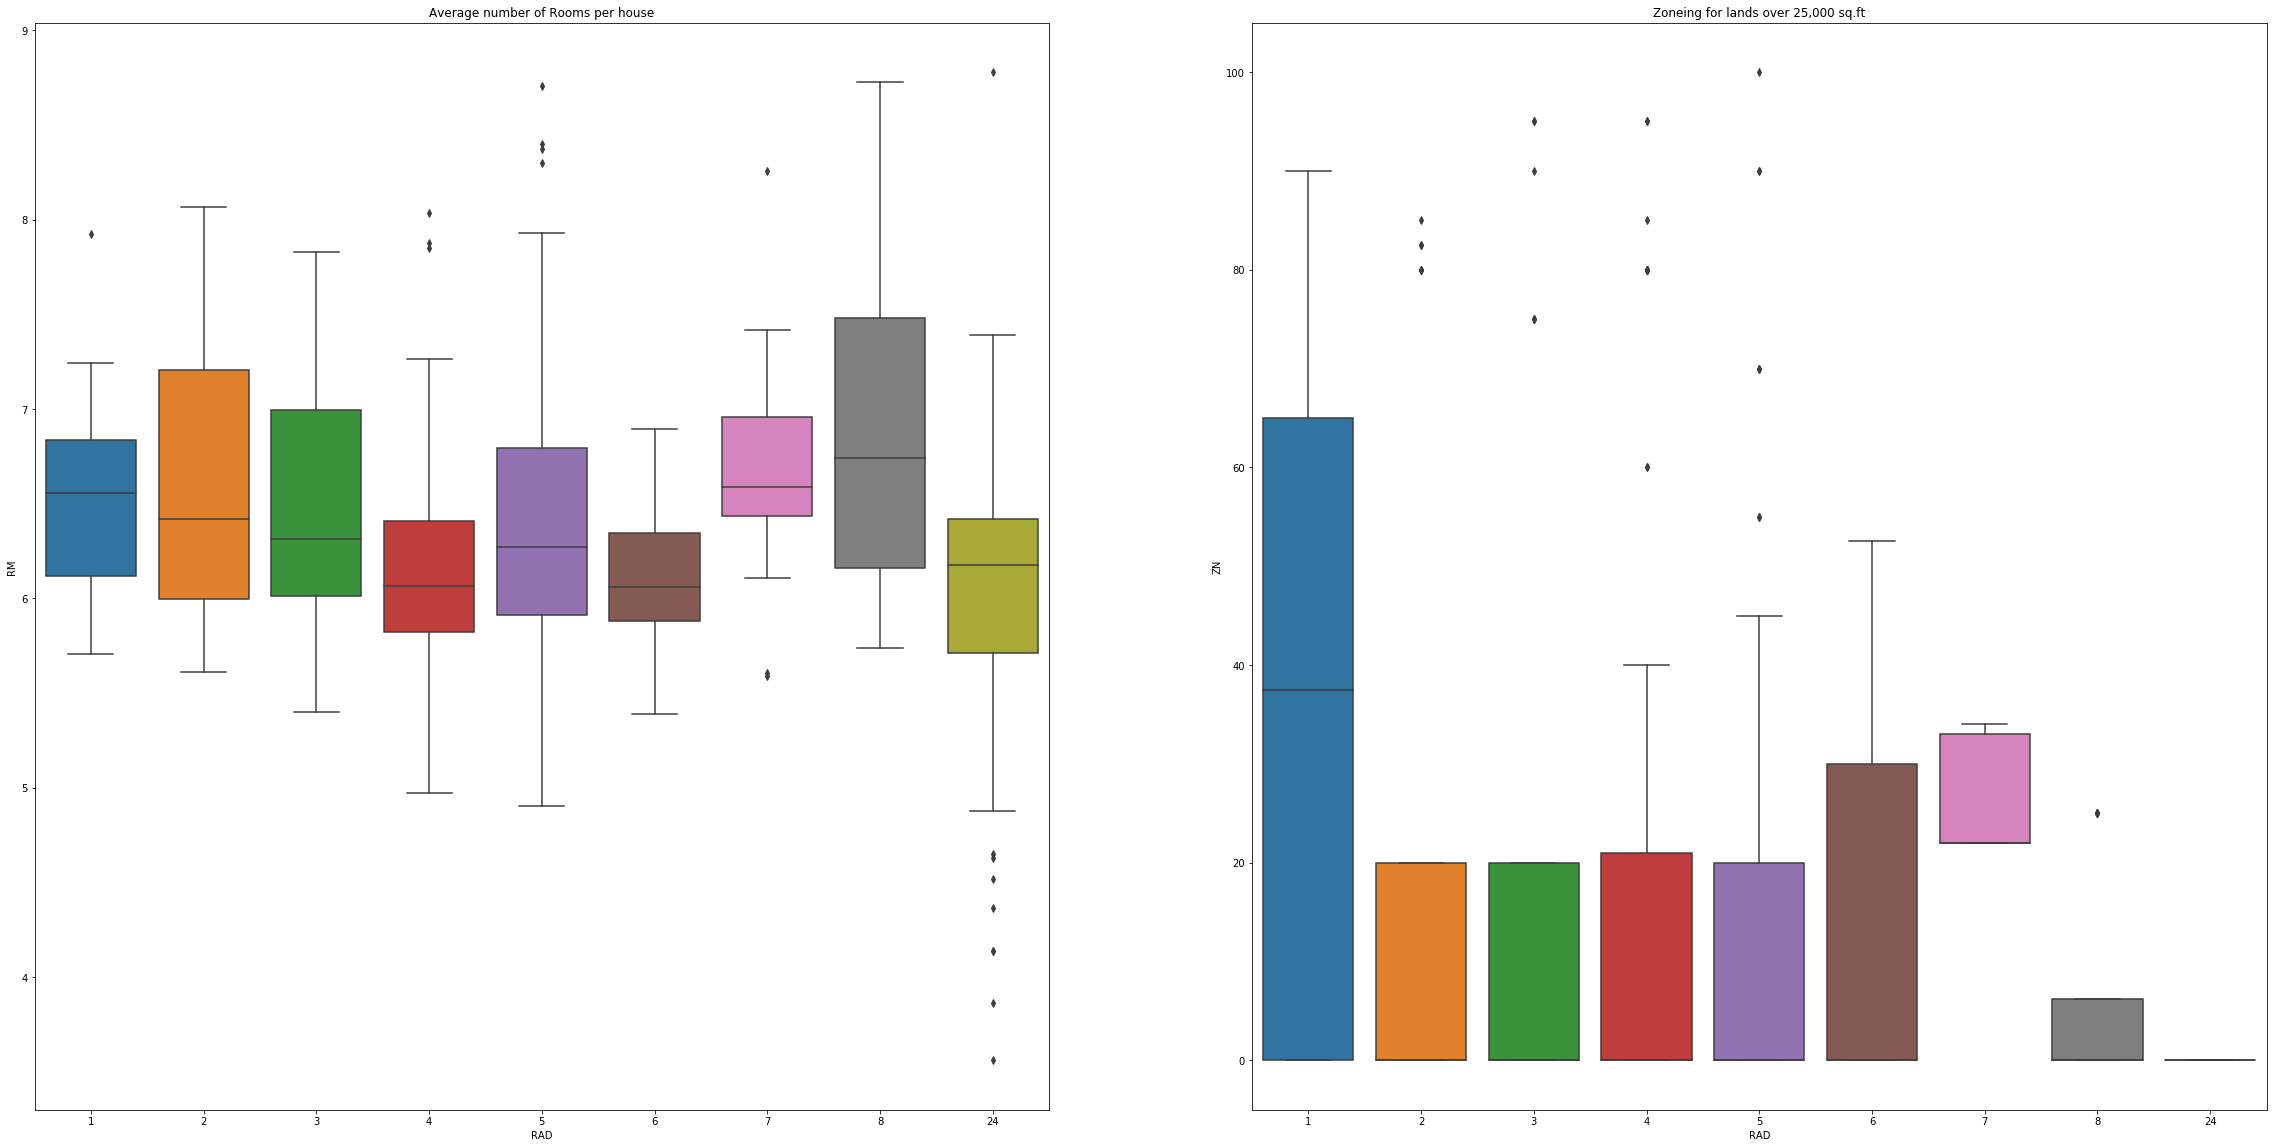

In [18]:
#playing with the categories RM, ZN and RAD
plt.figure(figsize=(40,20))
plt.subplot(121)
sns.boxplot(x='RAD',y='RM',data=housing).set_title('Average number of Rooms per house')

plt.subplot(122)
sns.boxplot(x='RAD',y='ZN',data=housing).set_title('Zoneing for lands over 25,000 sq.ft')

- There are many outliers in the baxplts! 

## Handling the outliers 


In [19]:
for feature in housing.keys():
    
    #Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(housing[feature], 25.0)
    print ("The first percentile for the feature '{}' is".format(feature), Q1)
    
    #Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(housing[feature], 75.0)
    print ("The third percentile for the feature '{}' is".format(feature), Q3)
    
    #Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    #Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    display(housing[~((housing[feature] >= Q1 - step) & (housing[feature] <= Q3 + step))])
    

#find the median for all the features
for feature in housing.keys():
    Q2 = np.percentile(housing[feature], 50.0)
    print ("The median for the feature '{}' is:".format(feature))
    print (Q2)

The first percentile for the feature 'CRIM' is 0.0819
The third percentile for the feature 'CRIM' is 2.3267175
Data points considered outliers for the feature 'CRIM':


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
356,8.98296,0.0,18.1,0.770,6.212,97.4,2.1222,24,666.0,20.2,377.73,17.60,17.8
370,6.53876,0.0,18.1,0.631,7.016,97.5,1.2024,24,666.0,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.1,0.631,6.216,100.0,1.1691,24,666.0,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.1,0.668,5.875,89.6,1.1296,24,666.0,20.2,347.88,8.88,50.0
374,8.49820,0.0,18.1,0.668,4.138,100.0,1.1370,24,666.0,20.2,396.90,37.97,13.8
375,9.60910,0.0,18.1,0.671,7.313,97.9,1.3163,24,666.0,20.2,396.90,13.44,15.0
377,9.82349,0.0,18.1,0.671,6.794,98.8,1.3580,24,666.0,20.2,396.90,21.24,13.3
379,7.86670,0.0,18.1,0.671,6.223,100.0,1.3861,24,666.0,20.2,393.74,21.78,10.2
380,8.97620,0.0,18.1,0.671,6.968,91.9,1.4165,24,666.0,20.2,396.90,17.21,10.4
381,5.87440,0.0,18.1,0.671,6.545,99.1,1.5192,24,666.0,20.2,396.90,21.08,10.9


The first percentile for the feature 'ZN' is 0.0
The third percentile for the feature 'ZN' is 12.5
Data points considered outliers for the feature 'ZN':


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
39,0.02763,75.0,2.95,0.4280,6.595,21.8,5.4011,3,252.0,18.3,395.63,4.32,30.8
40,0.03359,75.0,2.95,0.4280,7.024,15.8,5.4011,3,252.0,18.3,395.62,1.98,34.9
54,0.01360,75.0,4.00,0.4100,5.888,47.6,7.3197,3,469.0,21.1,396.90,14.80,18.9
55,0.01311,90.0,1.22,0.4030,7.249,21.9,8.6966,5,226.0,17.9,395.93,4.81,35.4
56,0.02055,85.0,0.74,0.4100,6.383,35.7,9.1876,2,313.0,17.3,396.90,5.77,24.7
57,0.01432,100.0,1.32,0.4110,6.816,40.5,8.3248,5,256.0,15.1,392.90,3.95,31.6
65,0.03584,80.0,3.37,0.3980,6.290,17.8,6.6115,4,337.0,16.1,396.90,4.67,23.5
66,0.04379,80.0,3.37,0.3980,5.787,31.1,6.6115,4,337.0,16.1,396.90,10.24,19.4
187,0.07875,45.0,3.44,0.4370,6.782,41.1,3.7886,5,398.0,15.2,393.87,6.68,32.0
188,0.12579,45.0,3.44,0.4370,6.556,29.1,4.5667,5,398.0,15.2,382.84,4.56,29.8


The first percentile for the feature 'INDUS' is 5.19
The third percentile for the feature 'INDUS' is 18.1
Data points considered outliers for the feature 'INDUS':


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


The first percentile for the feature 'NOX' is 0.449
The third percentile for the feature 'NOX' is 0.624
Data points considered outliers for the feature 'NOX':


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


The first percentile for the feature 'RM' is 5.8855
The third percentile for the feature 'RM' is 6.6235
Data points considered outliers for the feature 'RM':


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
97,0.12083,0.0,2.89,0.4450,8.069,76.0,3.4952,2,276.0,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0.4450,7.820,36.9,3.4952,2,276.0,18.0,393.53,3.57,43.8
162,1.83377,0.0,19.58,0.6050,7.802,98.2,2.0407,5,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,0.6050,8.375,93.9,2.1620,5,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.6050,7.929,96.2,2.0459,5,403.0,14.7,369.30,3.70,50.0
180,0.06588,0.0,2.46,0.4880,7.765,83.3,2.7410,3,193.0,17.8,395.56,7.56,39.8
186,0.05602,0.0,2.46,0.4880,7.831,53.6,3.1992,3,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.4220,7.875,32.0,5.6484,4,255.0,14.4,394.23,2.97,50.0
203,0.03510,95.0,2.68,0.4161,7.853,33.2,5.1180,4,224.0,14.7,392.78,3.81,48.5
204,0.02009,95.0,2.68,0.4161,8.034,31.9,5.1180,4,224.0,14.7,390.55,2.88,50.0


The first percentile for the feature 'AGE' is 45.025
The third percentile for the feature 'AGE' is 94.075
Data points considered outliers for the feature 'AGE':


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


The first percentile for the feature 'DIS' is 2.100175
The third percentile for the feature 'DIS' is 5.188425
Data points considered outliers for the feature 'DIS':


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
351,0.07950,60.0,1.69,0.411,6.579,35.9,10.7103,4,411.0,18.3,370.78,5.49,24.1
352,0.07244,60.0,1.69,0.411,5.884,18.5,10.7103,4,411.0,18.3,392.33,7.79,18.6
353,0.01709,90.0,2.02,0.410,6.728,36.1,12.1265,5,187.0,17.0,384.46,4.50,30.1
354,0.04301,80.0,1.91,0.413,5.663,21.9,10.5857,4,334.0,22.0,382.80,8.05,18.2
355,0.10659,80.0,1.91,0.413,5.936,19.5,10.5857,4,334.0,22.0,376.04,5.57,20.6


The first percentile for the feature 'RAD' is 4.0
The third percentile for the feature 'RAD' is 24.0
Data points considered outliers for the feature 'RAD':


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


The first percentile for the feature 'TAX' is 279.0
The third percentile for the feature 'TAX' is 666.0
Data points considered outliers for the feature 'TAX':


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


The first percentile for the feature 'PTRATIO' is 17.4
The third percentile for the feature 'PTRATIO' is 20.2
Data points considered outliers for the feature 'PTRATIO':


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
196,0.04011,80.0,1.52,0.404,7.287,34.1,7.3090,2,329.0,12.6,396.90,4.08,33.3
197,0.04666,80.0,1.52,0.404,7.107,36.6,7.3090,2,329.0,12.6,354.31,8.61,30.3
198,0.03768,80.0,1.52,0.404,7.274,38.3,7.3090,2,329.0,12.6,392.20,6.62,34.6
257,0.61154,20.0,3.97,0.647,8.704,86.9,1.8010,5,264.0,13.0,389.70,5.12,50.0
258,0.66351,20.0,3.97,0.647,7.333,100.0,1.8946,5,264.0,13.0,383.29,7.79,36.0
259,0.65665,20.0,3.97,0.647,6.842,100.0,2.0107,5,264.0,13.0,391.93,6.90,30.1
260,0.54011,20.0,3.97,0.647,7.203,81.8,2.1121,5,264.0,13.0,392.80,9.59,33.8
261,0.53412,20.0,3.97,0.647,7.520,89.4,2.1398,5,264.0,13.0,388.37,7.26,43.1
262,0.52014,20.0,3.97,0.647,8.398,91.5,2.2885,5,264.0,13.0,386.86,5.91,48.8
263,0.82526,20.0,3.97,0.647,7.327,94.5,2.0788,5,264.0,13.0,393.42,11.25,31.0


The first percentile for the feature 'B' is 375.3775
The third percentile for the feature 'B' is 396.225
Data points considered outliers for the feature 'B':


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
18,0.80271,0.0,8.14,0.538,5.456,36.6,3.7965,4,307.0,21.0,288.99,11.69,20.2
25,0.84054,0.0,8.14,0.538,5.599,85.7,4.4546,4,307.0,21.0,303.42,16.51,13.9
27,0.95577,0.0,8.14,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
32,1.38799,0.0,8.14,0.538,5.950,82.0,3.9900,4,307.0,21.0,232.60,27.71,13.2
34,1.61282,0.0,8.14,0.538,6.096,96.9,3.7598,4,307.0,21.0,248.31,20.34,13.5
102,0.22876,0.0,8.56,0.520,6.405,85.4,2.7147,5,384.0,20.9,70.80,10.63,18.6
118,0.13058,0.0,10.01,0.547,5.872,73.1,2.4775,6,432.0,17.8,338.63,15.37,20.4
134,0.97617,0.0,21.89,0.624,5.757,98.4,2.3460,4,437.0,21.2,262.76,17.31,15.6
145,2.37934,0.0,19.58,0.871,6.130,100.0,1.4191,5,403.0,14.7,172.91,27.80,13.8
146,2.15505,0.0,19.58,0.871,5.628,100.0,1.5166,5,403.0,14.7,169.27,16.65,15.6


The first percentile for the feature 'LSTAT' is 6.95
The third percentile for the feature 'LSTAT' is 16.955
Data points considered outliers for the feature 'LSTAT':


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
141,1.62864,0.0,21.89,0.624,5.019,100.0,1.4394,4,437.0,21.2,396.90,34.41,14.4
373,1.10810,0.0,18.10,0.668,4.906,100.0,1.1742,24,666.0,20.2,396.90,34.77,13.8
374,8.49820,0.0,18.10,0.668,4.138,100.0,1.1370,24,666.0,20.2,396.90,37.97,13.8
387,2.59710,0.0,18.10,0.700,5.000,89.5,1.5184,24,666.0,20.2,396.90,31.99,7.4
412,8.81100,0.0,18.10,0.597,4.628,100.0,1.5539,24,666.0,20.2,28.79,34.37,17.9
414,5.74610,0.0,18.10,0.693,4.519,100.0,1.6582,24,666.0,20.2,88.27,36.98,7.0
438,3.67810,0.0,18.10,0.740,5.935,87.9,1.8206,24,666.0,20.2,68.95,34.02,8.4


The first percentile for the feature 'MEDV' is 17.025
The third percentile for the feature 'MEDV' is 25.0
Data points considered outliers for the feature 'MEDV':


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
97,0.12083,0.0,2.89,0.4450,8.069,76.0,3.4952,2,276.0,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0.4450,7.820,36.9,3.4952,2,276.0,18.0,393.53,3.57,43.8
157,1.22358,0.0,19.58,0.6050,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
161,1.46336,0.0,19.58,0.6050,7.489,90.8,1.9709,5,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,0.6050,7.802,98.2,2.0407,5,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,0.6050,8.375,93.9,2.1620,5,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.6050,7.929,96.2,2.0459,5,403.0,14.7,369.30,3.70,50.0
179,0.05780,0.0,2.46,0.4880,6.980,58.4,2.8290,3,193.0,17.8,396.90,5.04,37.2
180,0.06588,0.0,2.46,0.4880,7.765,83.3,2.7410,3,193.0,17.8,395.56,7.56,39.8
182,0.09103,0.0,2.46,0.4880,7.155,92.2,2.7006,3,193.0,17.8,394.12,4.82,37.9


The median for the feature 'CRIM' is:
0.250895
The median for the feature 'ZN' is:
0.0
The median for the feature 'INDUS' is:
9.69
The median for the feature 'NOX' is:
0.538
The median for the feature 'RM' is:
6.2085
The median for the feature 'AGE' is:
77.5
The median for the feature 'DIS' is:
3.20745
The median for the feature 'RAD' is:
5.0
The median for the feature 'TAX' is:
330.0
The median for the feature 'PTRATIO' is:
19.05
The median for the feature 'B' is:
391.44
The median for the feature 'LSTAT' is:
11.36
The median for the feature 'MEDV' is:
21.2


### Delete the outliers that are outliers in more than one feature, namely; MEDV, PTRATIO, RM and B. 

In [20]:
#Select the indices for data points to remove from the dataset
outliers  = [97, 98, 162, 163, 166, 180, 186, 195, 203, 204, 224, 225, 226, 232, 233, 253, 157, 261, 262, 267, 268, 280, 283]

#Remove the outliers
good_data = housing.drop(housing.index[outliers]).reset_index(drop = True)
good_data.shape #now there are 483 rows instead of 506

(483, 13)

#### In the code block below, we will try to figure out the relavent feature to this dataset (meaning that omitting this feature will yeild low prediction accuracy). 

- *Note*: the score returns the coefficient of determination R^2 of the prediction, which means that when the score has the lowest value among all the other features, it has a high relevance. Vice versa for the highest value feature (close to 1). 

We aim here to keep the features that predict a target y hat, close to the target y true. 

In [21]:
from sklearn import tree
from sklearn.model_selection import train_test_split

# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
columns = list(good_data.columns)
for w in columns:
    # display the current target feature to be predicted
    display('Current feature to be predicted: {}'.format(w))
    
    # Split the data into training and testing sets using the given feature as the target
    features = good_data.drop(w,axis=1)
    labels = good_data[w]
    display(features.head(5))
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

    # Create a decision tree regressor and fit it to the training set
    regressor = tree.DecisionTreeRegressor()
    regressor = regressor.fit(X_train, y_train)
    predict = regressor.predict(X_test)

    score = regressor.score(X_test, y_test)
    print (score)

'Current feature to be predicted: CRIM'

,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


0.767529816393


'Current feature to be predicted: ZN'

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


0.776988905966


'Current feature to be predicted: INDUS'

,CRIM,ZN,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


0.904320395686


'Current feature to be predicted: NOX'

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


0.904529600288


'Current feature to be predicted: RM'

,CRIM,ZN,INDUS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


0.050052712968


'Current feature to be predicted: AGE'

,CRIM,ZN,INDUS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,6.0622,3,222.0,18.7,396.90,5.33,36.2


0.713598949357


'Current feature to be predicted: DIS'

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,3,222.0,18.7,396.90,5.33,36.2


0.807290176761


'Current feature to be predicted: RAD'

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


0.993045177607


'Current feature to be predicted: TAX'

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33,36.2


0.968527000637


'Current feature to be predicted: PTRATIO'

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,396.90,5.33,36.2


0.701907744864


'Current feature to be predicted: B'

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2


0.0987783784204


'Current feature to be predicted: LSTAT'

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,36.2


0.55757939873


'Current feature to be predicted: MEDV'

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


0.748858800901


#### The following features have the highest relavenence to this dataset (the order is from the higest relavence to the lowest):
- B (-0.19)
- RM (0.04)
- LSTAT (0.56)
- MEDV (0.67)
- AGE (0.68)

<center>

It's true that B and RM are the most relavenet features, however, they don't have a practical application! We think that they should be used in the dataset but only as relavent features NOT as a target feature. And since it is a Housing dataset, the only thing that would make sense is the Price feature, to provide to a prespective buyer or a prespective seller.

</center>

#### The highest score is for the lowest relevance feature RAD. So we thought it's safe to drop RAD at this point. 

In [22]:
#Drop RAD from the dataset
good_data.drop(['RAD'], axis=1, inplace=True)
good_data.head()


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


In [23]:
good_data.shape

(483, 12)

### The price feature "MEDV" will be the label. 


In [24]:
# Drop MEDV from the dataset to later apply PCA to it
df = good_data.copy()
df.drop(['MEDV'], axis=1, inplace=True)
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33


In [25]:
# Create a new dataFrame for the labels - which won't be processed by PCA method 
labels = good_data['MEDV']
labels = pd.DataFrame(labels, columns = ['MEDV'])
labels.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Apply PCA to the dataset without the labels 

In [26]:
from sklearn.decomposition import PCA

#Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=11)
pca = pca.fit(df)

# explain the variance ratio in summation of the PCs
print("% of variance in the features explained by PCA", 
      pca.explained_variance_ratio_.cumsum())

% of variance in the features explained by PCA [ 0.80365155  0.97153977  0.99210918  0.99874164  0.99943275  0.99981428
  0.99989632  0.9999643   0.99999451  0.99999992  1.        ]


*pca.explained_variance_ratio_.cumsum()* 
returns the accumulative ratio for the explained variance. 
- So here, the principle component retains ~80% of all the variance in the dataset! 
- The second component + the principle component (in combination) retain ~97%. 
- The 3rd component in combination with the 2nd and the principle component retain ~99.2%. 
- The principle + 2nd + 3rd + 4th retain ~99.8%. 
- The 5th component in combination with all the previous ones retain ~99.9%. 

##### We want to avoid the curs of dimentionality represented in features that don't add much value to the dataset. So We will only consider the first 5 components for analysis from now on. 

In [27]:
# Apply PCA by fitting the data with only five dimensions
pca = PCA(n_components=5)
pca.fit(df)

def pca_results(df, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = df.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

,Explained Variance,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
Dimension 1,0.8037,0.0121,-0.0413,0.0278,0.0005,-0.0009,0.0844,-0.0068,0.9501,0.0052,-0.2949,0.0220
Dimension 2,0.1679,-0.0028,-0.0004,-0.0046,0.0000,0.0003,-0.0058,0.0004,-0.2959,-0.0025,-0.9552,0.0057
Dimension 3,0.0206,-0.0075,0.6139,-0.0909,-0.0019,0.0054,-0.7701,0.0458,0.0930,-0.0118,-0.0245,-0.1015
Dimension 4,0.0066,0.0037,0.7832,-0.0188,0.0006,0.0043,0.6185,0.0083,-0.0205,-0.0278,0.0027,0.0491
Dimension 5,0.0007,0.0049,0.0459,0.2747,0.0017,-0.0600,-0.1239,0.0004,-0.0144,0.0300,0.0095,0.9499


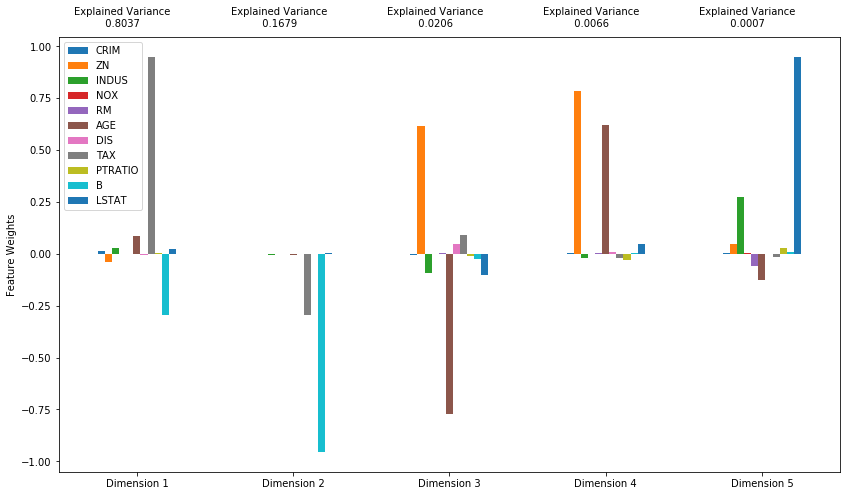

In [28]:
# Generate PCA results plot
pca_results(df, pca)

The dark blue bar represents LSTAT feature, not CRIM. And the orange bar represents MEDV, not ZN. 
We know that from the relavent feature extraction section we did above, using the coefficient of determination R^2. 
As LSTAT and MEDV scored high in this method. 

### Breif description of the trend seen in the graph:

- 1st PC (Dimension 1) shows a great information gain from the positive weight of the TAX feature mostly, and some gain from the AGE feature. The negatively weighted features also add a great addition to the overall infomation gain as it shows the negative corrolation; and that is prominant in the two features (B and MEDV). However, the 1ar PC doesn't explain all the variance in the data and it badly predicts the other features and needs another component to help. 

- 2nd PC shows something contridectory to the 1st PC; i.e. the negative weights for both features (B and TAX). But the 1st and 2nd PCs are uncorrolated. So they retain different variance as the eigenvalues of each is orthogonal to the other.

- 3rd PC makes a lot more sense than the 2nd, as it shows that when the proportion of houses built proir to 1940 is low, the price of the houses in the neighborhood is high. In other words, recently built houses cost more. 

- 5th PC shows that when the percent of the lowr status of the population "LSTAT" is low, the price of the houses "MEDV" increases. 



### Reduce the data to the most relevant features '5'

In [29]:
reduced_data = pca.fit_transform(df)
reduced_data = pd.DataFrame(reduced_data, columns = 
                                ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4','Dimension 5'])

reduced_data.head()

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5
0,-125.504641,-4.875113,-3.254523,5.788600,-7.433576
1,-174.678434,11.027911,-30.723564,1.320319,-3.836092
2,-175.094279,14.989765,-16.394002,-9.946878,-6.568640
3,-196.081588,19.292449,-5.923406,-18.973710,-6.707580
4,-195.988839,17.089081,-12.689552,-13.654378,-5.465548


Now that we know the most relevant features (only in numbers/dimentions), using PCA; we want to also use a different method just for experimentation. Nontheless, it should produce the same result as PCA, if it works correctly. 

### Shuffle and Split Data

In [30]:
# Split the 'features' and 'labels' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size = 0.2, random_state = 0)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 386 samples.
Testing set has 97 samples.


## Extracting Feature Importance

In [31]:
# Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest

# Train the model  
model = RandomForestClassifier()
model.fit(X_train, np.ravel(y_train).astype('int'))

# Extract the feature importances
importances = model.feature_importances_
importances.sort(axis=-1)

print(importances)

[ 0.01958471  0.04722036  0.05363548  0.05468331  0.08147602  0.10332902
  0.10955898  0.11185607  0.12441095  0.1367667   0.1574784 ]


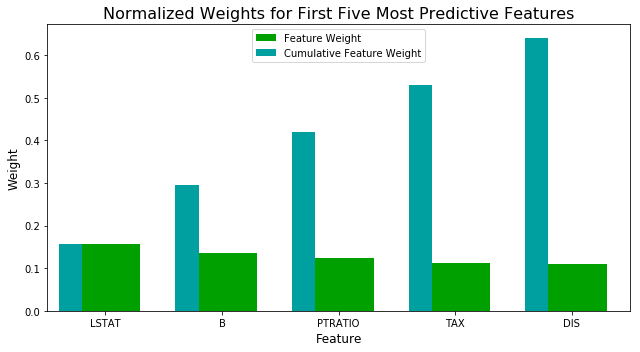

In [32]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show() 
    
    
# plot   
feature_plot(importances, X_train, y_train)

In [33]:
# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

X_train_reduced.head()
# X_test_reduced.head()

,LSTAT,B,PTRATIO,TAX,DIS
264,7.14,396.90,16.6,293.0,7.3172
235,3.59,377.07,19.1,330.0,7.3967
200,23.98,395.24,18.6,277.0,3.6650
213,6.36,372.08,17.4,307.0,3.2157
278,9.50,395.75,16.1,329.0,5.4917


In [34]:
from sklearn.metrics import r2_score
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: labels training set
       - X_test: features testing set
       - y_test: labels testing set
    '''
    sample_size = 300
    
    results = {}
    
    start = time() 
    
    # Fit the learner to the training data using slicing with 'sample_size'
    learner.fit(X_train_reduced[:sample_size],y_train[:sample_size])
    
    end = time() 
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set,
    # then get predictions on the first 300 training samples
    
    start = time() 
    predictions_test = learner.predict(X_test_reduced)
    predictions_train = learner.predict(X_train_reduced[:300])
    end = time() 
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples
    results['r2_train'] = r2_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set
    results['r2_test'] = r2_score(y_test, predictions_test)
       
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))

    return results

In [35]:
from sklearn import linear_model
from sklearn.svm import SVC

# Initialize the three models
reg_A = linear_model.Lasso(alpha = 0.1, random_state=3)
reg_B = linear_model.ElasticNet(random_state=3)
reg_C = SVC(kernel="rbf", random_state=3)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(len(X_train_reduced) * 0.01)
samples_10 = int(len(X_train_reduced) * 0.1)
samples_100 = int(len(X_train_reduced))

# Collect results on the learners
results = {}
for reg in [reg_A, reg_B, reg_C]:
    reg_name = reg.__class__.__name__
    results[reg_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[reg_name][i] = \
        train_predict(reg, samples, X_train_reduced, np.ravel(y_train).astype('int'), X_test_reduced, np.ravel(y_test).astype('int'))

Lasso trained on 300 samples.
Lasso trained on 300 samples.
Lasso trained on 300 samples.
ElasticNet trained on 300 samples.
ElasticNet trained on 300 samples.
ElasticNet trained on 300 samples.
SVC trained on 300 samples.
SVC trained on 300 samples.
SVC trained on 300 samples.


### Compare the performance of three Regression models

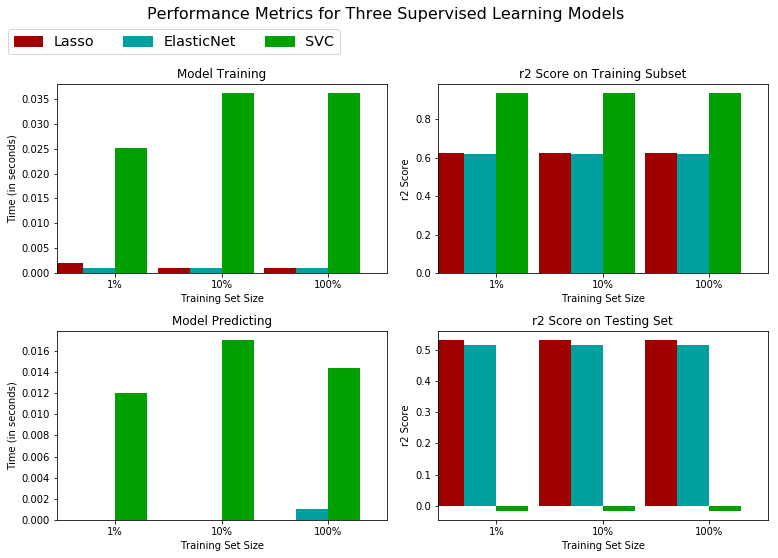

In [36]:
import matplotlib.patches as mpatches

def evaluate(results, r2):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - r2-score: The coefficient of determination
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 2, figsize = (11, 7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'r2_train', 'pred_time', 'r2_test']):
            for i in np.arange(3):
                _x = int(j/2)
                _y = j%2
                
                # Creative plot code
                ax[_x, _y].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[_x, _y].set_xticks([0.45, 1.45, 2.45])
                ax[_x, _y].set_xticklabels(["1%", "10%", "100%"])
                ax[_x, _y].set_xlabel("Training Set Size")
                ax[_x, _y].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("r2 Score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("r2 Score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("r2 Score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("r2 Score on Testing Set")

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.60), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

evaluate(results, score)

- SVM(kernel='rbf') is the worst performing model for this dataset, in terms of training and prediction time, and also in the Accuracy score. As it over-fitted the training set, which resulted in a very bad performance on the testing set. 
- The models(ElasticNet and Lasso) performed well for the testing set, also the time for training and prediction was much better than SVM(kernel='rbf').

- For the optimization,however, we will use the Lasso Model, as it performed slightly better than the ElasticNet Model. 

## The Optimization step

In [37]:
from sklearn import grid_search
from sklearn.metrics import make_scorer

# Initialize the classifier
reg = linear_model.Lasso(random_state=3)

# Tune the params
parameters =  {'tol': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 50000], 
              'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Make a scoring object
scorer = make_scorer(r2_score)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = grid_search.GridSearchCV(estimator=reg, param_grid=parameters , scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train_reduced, y_train)

# Get the estimator
best_reg = grid_fit.best_estimator_

# Make predictions using the unoptimized model
predictions = (reg.fit(X_train_reduced, y_train)).predict(X_test_reduced)
best_predictions = best_reg.predict(X_test_reduced)

# The before-and-after scores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(r2_score(y_test, predictions)))

print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(r2_score(y_test, best_predictions)))


C:\Users\001122940\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\001122940\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Unoptimized model
------
Accuracy score on testing data: 0.5137

Optimized Model
------
Final accuracy score on the testing data: 0.5506


- Tuning the parameters of the best regression function, optimized the model performance (from ~51% to ~55%). And perhaps, tuning the params further could produce better results. 